In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import gzip,pickle

In [99]:
import pandas as pd
from keras.utils.np_utils import to_categorical

In [3]:
import matplotlib

In [4]:
import theano
import theano.tensor as T
import net3
#from net3 import sigmoid, tanh, ReLU, Network
#from net3 import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer

Trying to run under a GPU.  If this is not desired, then modify network3.py
to set the GPU flag to False.


In [5]:
mini_batch_size=10
learning_rate=0.1

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

Using Theano backend.


In [191]:
#code has been adopted from Micheal Neilsen (with some modifications): see detailed reference below
def vectorized_result(j):
    ##Return a 10-dimensional unit vector with a 1.0 in the jth
    ##position and zeroes elsewhere.  This is used to convert a digit
    ##(0...9) into a corresponding desired output from the neural network
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

def load_data():
    ##Return the MNIST data as a tuple containing the training data,
    ##the validation data, and the test data.

    f = gzip.open('./data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = pickle.load(f,encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)


def load_data_wrapper():
    ##Return a tuple containing ``(training_data, validation_data,
    ##test_data)``. Based on ``load_data``, but the format is more
    ##convenient for use in our implementation of neural networks.

    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (28,28,1)) for x in tr_d[0]]
    #training_results = [vectorized_result(y) for y in tr_d[1]]
    training_data = zip(training_inputs, tr_d[1])
    validation_inputs = [np.reshape(x, (28,28,1)) for x in va_d[0]]
    #validation_results=[vectorized_result(y) for y in va_d[1]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (28,28,1)) for x in te_d[0]]
    #test_results = [vectorized_result(y) for y in te_d[1]]
    test_data = zip(test_inputs, te_d[1])
    return (list(training_data), list(validation_data), list(test_data))

In [192]:
train,val,test=load_data_wrapper()

In [108]:
type(train)

list

In [109]:
len(val)

10000

In [110]:
len(train)

50000

In [111]:
len(test)

10000

In [112]:
train[1][0].shape

(28, 28, 1)

In [85]:
train[0][0].reshape(-1,28).shape

(28, 28)

In [16]:
#print the encoding
print(train[0][0].transpose())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [29]:
#print the label
print(train[0][1].transpose())

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [80]:
def lab_print(label):
    return np.sum(np.multiply(label.reshape(1,10),np.arange(0,10)))

In [91]:
def mnist_plot(image):
    b=image.reshape(-1, 28) #reshape to 28 by 28 image
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(b, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

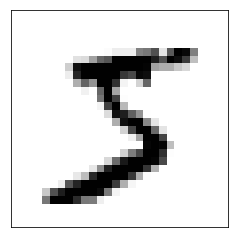

In [92]:
#first image
mnist_plot(train[0][0])

In [23]:
#label
lab_print(train[0][1])

5.0

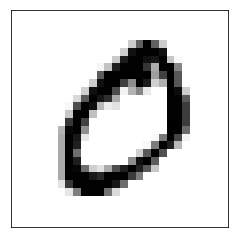

In [24]:
#second image
mnist_plot(train[1][0])

In [19]:
#second label
lab_print(train[1][1])

0.0

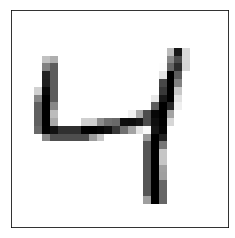

In [25]:
#third image
mnist_plot(train[2][0])

In [21]:
#third label
lab_print(train_list[2][1])

4.0

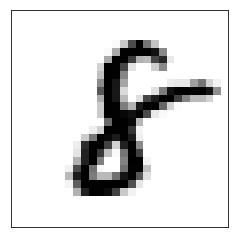

In [22]:
#500th image
mnist_plot(train_list[499][0])

In [23]:
#500th label
lab_print(train_list[499][1])

8.0

## 2. Experiment with different Neural network structures

In [8]:
def shared(data):
        """Place the data into shared variables.  This allows Theano to copy
        the data to the GPU, if one is available.

        """
        shared_x = theano.shared(
            np.asarray(data[0], dtype=theano.config.floatX), borrow=True)
        shared_y = theano.shared(
            np.asarray(data[1], dtype=theano.config.floatX), borrow=True)
        return shared_x, T.cast(shared_y, "int32")

In [253]:
#GLOBAL VARIABLES
annealer = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** x, verbose=0)
styles=[':','-.','--','dotted','solid']

In [209]:
1e-3*0.95**1

0.00095

In [193]:
#select the image and the label
xtrain=[t[0] for t in train]
ytrain=[t[1] for t in train]

In [194]:
#convert to numpy format
xtrain=np.asarray(xtrain)
ytrain=to_categorical(ytrain,num_classes=10)

In [195]:
xval=[v[0] for v in val]
yval=[v[1] for v in val]

In [196]:
xval=np.asarray(xval)
yval=to_categorical(yval,num_classes=10)

In [190]:
yval[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [68]:
del train, val

### 2.1 Fully connected Layers 

#### 2.1.1 Model 1 - A  Network with a single fully connected hidden layers with  relu activation

In [237]:
#Build a shallow network with a single hidden layer
nets = 1
model1 = [0]*nets

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(100, activation='relu',input_shape=(28,28,1)))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [238]:
#Estimate the model
epochs = 15
h1 = model1.fit(xtrain,ytrain, batch_size=10, epochs = epochs,validation_data = (xval,yval), callbacks=[annealer], verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 6s 120us/step - loss: 0.4601 - acc: 0.8761 - val_loss: 0.2646 - val_acc: 0.9266
Epoch 2/15
50000/50000 [==============================] - 5s 106us/step - loss: 0.2589 - acc: 0.9264 - val_loss: 0.2143 - val_acc: 0.9402
Epoch 3/15
50000/50000 [==============================] - 6s 113us/step - loss: 0.2119 - acc: 0.9398 - val_loss: 0.1827 - val_acc: 0.9500
Epoch 4/15
50000/50000 [==============================] - 6s 126us/step - loss: 0.1807 - acc: 0.9484 - val_loss: 0.1619 - val_acc: 0.9559
Epoch 5/15
50000/50000 [==============================] - 6s 113us/step - loss: 0.1588 - acc: 0.9545 - val_loss: 0.1508 - val_acc: 0.9573
Epoch 6/15
50000/50000 [==============================] - 6s 120us/step - loss: 0.1427 - acc: 0.9594 - val_loss: 0.1374 - val_acc: 0.9626
Epoch 7/15
50000/50000 [==============================] - 5s 110us/step - loss: 0.1296 - acc: 0.9636 - val_loss: 0.1286 - 

In [239]:
print("NN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format("Model1",epochs,max(h1.history['acc']),max(h1.history['val_acc'])))

NN Model1: Epochs=15, Train accuracy=0.97806, Validation accuracy=0.97140


#### 2.2 Model 2 - A  Network with two fully connected hidden layers with sigmoid and relu activation

In [234]:
#Build a shallow network with a single hidden layer
nets = 1
model2 = [0]*nets

model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(300, activation='sigmoid',input_shape=(28,28,1)))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [235]:
#Estimate the model
epochs = 15
h2 = model2.fit(xtrain,ytrain, batch_size=10, epochs = epochs,validation_data = (xval,yval), callbacks=[annealer], verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 6s 122us/step - loss: 0.7378 - acc: 0.7993 - val_loss: 0.3553 - val_acc: 0.8961
Epoch 2/15
50000/50000 [==============================] - 6s 126us/step - loss: 0.3521 - acc: 0.8971 - val_loss: 0.2915 - val_acc: 0.9134
Epoch 3/15
50000/50000 [==============================] - 6s 123us/step - loss: 0.3104 - acc: 0.9094 - val_loss: 0.2759 - val_acc: 0.9199
Epoch 4/15
50000/50000 [==============================] - 6s 123us/step - loss: 0.2860 - acc: 0.9161 - val_loss: 0.2577 - val_acc: 0.9243
Epoch 5/15
50000/50000 [==============================] - 6s 128us/step - loss: 0.2656 - acc: 0.9221 - val_loss: 0.2391 - val_acc: 0.9314
Epoch 6/15
50000/50000 [==============================] - 6s 121us/step - loss: 0.2480 - acc: 0.9269 - val_loss: 0.2339 - val_acc: 0.9307
Epoch 7/15
50000/50000 [==============================] - 6s 125us/step - loss: 0.2328 - acc: 0.9322 - val_loss: 0.2157 - 

In [236]:
print("NN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format("Model2",epochs,max(h2.history['acc']),max(h2.history['val_acc'])))

NN Model2: Epochs=15, Train accuracy=0.95126, Validation accuracy=0.95360


#### 2.3 Model 3 - A  Network with two fully connected hidden layers with relu activation in both

In [240]:
#Build a NN network with a two hidden layers
nets = 1
model3 = [0]*nets

model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(300, activation='relu',input_shape=(28,28,1)))
model3.add(Dense(100, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [241]:
#Estimate the model
epochs = 15
h3 = model3.fit(xtrain,ytrain, batch_size=10, epochs = epochs,validation_data = (xval,yval), callbacks=[annealer], verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 6s 124us/step - loss: 0.4004 - acc: 0.8886 - val_loss: 0.2087 - val_acc: 0.9431
Epoch 2/15
50000/50000 [==============================] - 5s 105us/step - loss: 0.1926 - acc: 0.9437 - val_loss: 0.1480 - val_acc: 0.9581
Epoch 3/15
50000/50000 [==============================] - 6s 115us/step - loss: 0.1417 - acc: 0.9585 - val_loss: 0.1267 - val_acc: 0.9653
Epoch 4/15
50000/50000 [==============================] - 9s 180us/step - loss: 0.1127 - acc: 0.9671 - val_loss: 0.1075 - val_acc: 0.9691
Epoch 5/15
50000/50000 [==============================] - 9s 171us/step - loss: 0.0931 - acc: 0.9726 - val_loss: 0.1053 - val_acc: 0.9699
Epoch 6/15
50000/50000 [==============================] - 10s 196us/step - loss: 0.0791 - acc: 0.9764 - val_loss: 0.0980 - val_acc: 0.9729
Epoch 7/15
50000/50000 [==============================] - 9s 190us/step - loss: 0.0690 - acc: 0.9803 - val_loss: 0.0899 -

In [242]:
print("NN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format("Model3",epochs,max(h3.history['acc']),max(h3.history['val_acc'])))

NN Model3: Epochs=15, Train accuracy=0.99356, Validation accuracy=0.97850


### 2.1.4 Model 4 - A  Network with two fully connected hidden layers with tanh and relu activation

In [243]:
#Build a network with two hidden layers
nets = 1
model4 = [0]*nets

model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(300, activation='tanh',input_shape=(28,28,1)))
model4.add(Dense(100, activation='relu'))
model4.add(Dense(10, activation='softmax'))
model4.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [244]:
#Estimate the model
epochs = 15
h4 = model4.fit(xtrain,ytrain, batch_size=10, epochs = epochs,validation_data = (xval,yval), callbacks=[annealer], verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 11s 215us/step - loss: 0.3794 - acc: 0.8944 - val_loss: 0.2150 - val_acc: 0.9379
Epoch 2/15
50000/50000 [==============================] - 11s 214us/step - loss: 0.2021 - acc: 0.9414 - val_loss: 0.1650 - val_acc: 0.9529
Epoch 3/15
50000/50000 [==============================] - 11s 217us/step - loss: 0.1575 - acc: 0.9540 - val_loss: 0.1416 - val_acc: 0.9598
Epoch 4/15
50000/50000 [==============================] - 10s 202us/step - loss: 0.1311 - acc: 0.9614 - val_loss: 0.1313 - val_acc: 0.9630
Epoch 5/15
50000/50000 [==============================] - 10s 200us/step - loss: 0.1137 - acc: 0.9666 - val_loss: 0.1170 - val_acc: 0.9664
Epoch 6/15
50000/50000 [==============================] - 10s 193us/step - loss: 0.0995 - acc: 0.9709 - val_loss: 0.1090 - val_acc: 0.9692
Epoch 7/15
50000/50000 [==============================] - 10s 200us/step - loss: 0.0896 - acc: 0.9737 - val_loss: 0.

In [245]:
print("NN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format("Model4",epochs,max(h4.history['acc']),max(h4.history['val_acc'])))

NN Model4: Epochs=15, Train accuracy=0.98770, Validation accuracy=0.97700


### 2.1.5 Model 5 - A Convolution Neural Network with a single convolution layer and 1 Fully Connected layer

In [ ]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 1
model = [0]*nets

model = Sequential()
model.add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [213]:
#Estimate the model
epochs = 15
history = model.fit(xtrain,ytrain, batch_size=10, epochs = epochs,validation_data = (xval,yval), callbacks=[annealer], verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 68s 1ms/step - loss: 0.3029 - acc: 0.9094 - val_loss: 0.1399 - val_acc: 0.9598
Epoch 2/15
50000/50000 [==============================] - 68s 1ms/step - loss: 0.1160 - acc: 0.9645 - val_loss: 0.0894 - val_acc: 0.9738
Epoch 3/15
50000/50000 [==============================] - 67s 1ms/step - loss: 0.0771 - acc: 0.9773 - val_loss: 0.0725 - val_acc: 0.9782
Epoch 4/15
50000/50000 [==============================] - 68s 1ms/step - loss: 0.0583 - acc: 0.9829 - val_loss: 0.0622 - val_acc: 0.9833
Epoch 5/15
50000/50000 [==============================] - 65s 1ms/step - loss: 0.0475 - acc: 0.9862 - val_loss: 0.0560 - val_acc: 0.9836
Epoch 6/15
50000/50000 [==============================] - 63s 1ms/step - loss: 0.0391 - acc: 0.9887 - val_loss: 0.0597 - val_acc: 0.9835
Epoch 7/15
50000/50000 [==============================] - 64s 1ms/step - loss: 0.0332 - acc: 0.9901 - val_loss: 0.0537 - val_acc

ValueError: Unknown format code 'd' for object of type 'float'

In [227]:
print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format("Model5",epochs,max(history.history['acc']),max(history.history['val_acc'])))

CNN Model1: Epochs=15, Train accuracy=0.99736, Validation accuracy=0.98660


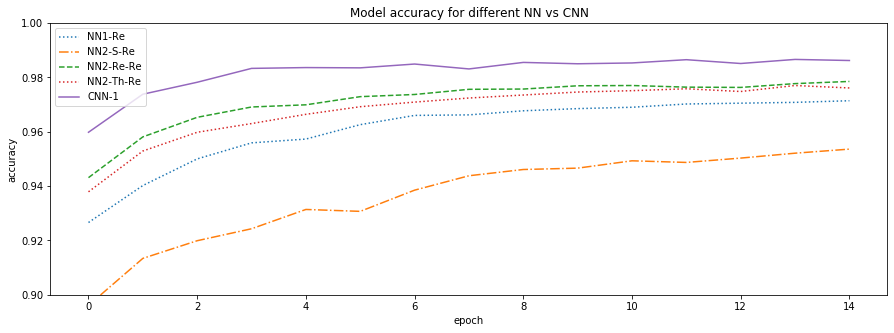

In [255]:
name=['NN1-Re','NN2-S-Re','NN2-Re-Re','NN2-Th-Re','CNN-1']
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
plt.plot(h1.history['val_acc'],linestyle=styles[0])
plt.plot(h2.history['val_acc'],linestyle=styles[1])
plt.plot(h3.history['val_acc'],linestyle=styles[2])
plt.plot(h4.history['val_acc'],linestyle=styles[3])
plt.plot(history.history['val_acc'],linestyle=styles[4])
plt.title('Model accuracy for different NN vs CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(name, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.90,1])
plt.show()

The analysis shows some interesting results for simple Neural Network models and Convolution Neural Network models. Firstly, the CNN significantly outperforms all the different models. The CNN has only one fully connected layer and one convolution layer with max pooling. 
The other models use different activations functions and neural network structures:
   
   1) NN1-RE: This is Model 1 above and is single layer with (100 neurons) and Relu activation function
   
   2) NN2-S-RE: This is Model 2 above and is two hidden layers with 300 and 100  neurons with sigmoid and one Relu activation function
   
   3) NN2-Re-Re: This is Model 3 above and is two hidden layers with 300 and 100  neurons and two Relu activation functions
   
   4) NN2-Th-Re: This is Model 4 above and is two hidden layers with 300 and 100  neurons and tanh, Relu activation functions

The relu activation functions outperform other dense layer specifications although the tanh activation function seems to catch up and quite closely perform the relu specification (NN2-Re-Re). 

Let see how regularization might change the performance of these results. 

### 2.6 Model 6 - Regularizing the Neural Network with two fully connected hidden layers and relu activation

In [256]:
from keras import regularizers as norm

In [267]:
#Build a NN network with a two hidden layers
nets = 1
model6 = [0]*nets

model6 = Sequential()
model6.add(Flatten())
model6.add(Dense(300, activation='relu',input_shape=(28,28,1), kernel_regularizer=norm.l2(0.01)))
model6.add(Dense(100, activation='relu', kernel_regularizer=norm.l2(0.05)))
model6.add(Dense(10, activation='softmax'))
model6.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [268]:
#Estimate the model
epochs = 15
h6 = model6.fit(xtrain,ytrain, batch_size=10, epochs = epochs,validation_data = (xval,yval), callbacks=[annealer], verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 10s 197us/step - loss: 3.4684 - acc: 0.8622 - val_loss: 1.2925 - val_acc: 0.8947
Epoch 2/15
50000/50000 [==============================] - 10s 191us/step - loss: 0.9417 - acc: 0.8995 - val_loss: 0.7004 - val_acc: 0.9133
Epoch 3/15
50000/50000 [==============================] - 10s 205us/step - loss: 0.6634 - acc: 0.9074 - val_loss: 0.5910 - val_acc: 0.9185
Epoch 4/15
50000/50000 [==============================] - 10s 192us/step - loss: 0.5934 - acc: 0.9142 - val_loss: 0.5404 - val_acc: 0.9277
Epoch 5/15
50000/50000 [==============================] - 10s 191us/step - loss: 0.5603 - acc: 0.9184 - val_loss: 0.5228 - val_acc: 0.9300
Epoch 6/15
50000/50000 [==============================] - 9s 188us/step - loss: 0.5390 - acc: 0.9223 - val_loss: 0.5014 - val_acc: 0.9332
Epoch 7/15
50000/50000 [==============================] - 10s 197us/step - loss: 0.5227 - acc: 0.9259 - val_loss: 0.4

In [269]:
print("NN Regularized {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format("Model6",epochs,max(h6.history['acc']),max(h6.history['val_acc'])))

NN Regularized Model6: Epochs=15, Train accuracy=0.93902, Validation accuracy=0.94720


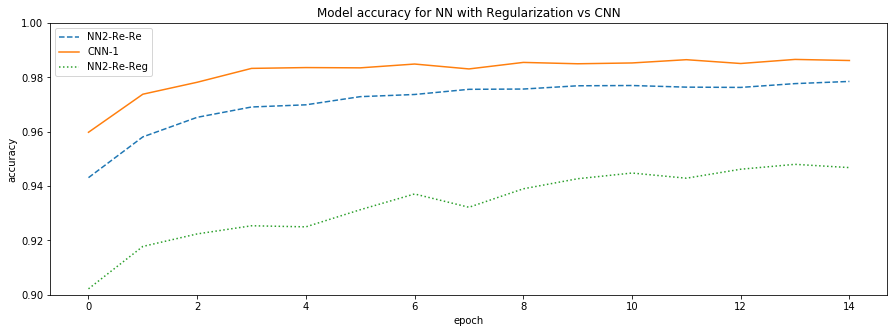

In [263]:
name=['NN2-Re-Re','CNN-1','NN2-Re-Reg']
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
plt.plot(h3.history['val_acc'],linestyle=styles[2])
plt.plot(history.history['val_acc'],linestyle=styles[4])
plt.plot(h6.history['val_acc'],linestyle=styles[0])
plt.title('Model accuracy for NN with Regularization vs CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(name, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.90,1])
plt.show()

### 2.2 Convolution Neural Networks 

In [272]:
# BUILD CONVOLUTIONAL NEURAL NETWORKS
nets = 1
model1C = [0]*nets

model1C = Sequential()
model1C.add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
model1C.add(AvgPool2D())
model1C.add(Flatten())
model1C.add(Dense(256, activation='relu'))
model1C.add(Dense(10, activation='softmax'))
model1C.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [273]:
#Estimate the model
epochs = 15
h1C = model1C.fit(xtrain,ytrain, batch_size=10, epochs = epochs,validation_data = (xval,yval), callbacks=[annealer], verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 40s 795us/step - loss: 0.3421 - acc: 0.9015 - val_loss: 0.1564 - val_acc: 0.9562
Epoch 2/15
50000/50000 [==============================] - 39s 782us/step - loss: 0.1434 - acc: 0.9559 - val_loss: 0.1179 - val_acc: 0.9653
Epoch 3/15
50000/50000 [==============================] - 40s 806us/step - loss: 0.1057 - acc: 0.9683 - val_loss: 0.0913 - val_acc: 0.9731
Epoch 4/15
50000/50000 [==============================] - 40s 802us/step - loss: 0.0843 - acc: 0.9739 - val_loss: 0.0839 - val_acc: 0.9760
Epoch 5/15
50000/50000 [==============================] - 41s 815us/step - loss: 0.0698 - acc: 0.9790 - val_loss: 0.0779 - val_acc: 0.9762
Epoch 6/15
50000/50000 [==============================] - 41s 822us/step - loss: 0.0607 - acc: 0.9817 - val_loss: 0.0821 - val_acc: 0.9748
Epoch 7/15
50000/50000 [==============================] - 40s 793us/step - loss: 0.0520 - acc: 0.9848 - val_loss: 0.

In [274]:
print("CNN AvgPool {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format("1C",epochs,max(h1C.history['acc']),max(h1C.history['val_acc'])))

CNN AvgPool 1C: Epochs=15, Train accuracy=0.99470, Validation accuracy=0.98340


In [277]:
# Add additional layers for convolution
nets = 1
model2C = [0]*nets

model2C = Sequential()
model2C.add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
model2C.add(MaxPool2D())
model2C.add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
model2C.add(MaxPool2D())
model2C.add(Flatten())
model2C.add(Dense(256, activation='relu'))
model2C.add(Dense(10, activation='softmax'))
model2C.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [278]:
#Estimate the model
epochs = 15
h2C = model2C.fit(xtrain,ytrain, batch_size=10, epochs = epochs,validation_data = (xval,yval), callbacks=[annealer], verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 89s 2ms/step - loss: 0.2381 - acc: 0.9289 - val_loss: 0.0797 - val_acc: 0.9768
Epoch 2/15
50000/50000 [==============================] - 90s 2ms/step - loss: 0.0705 - acc: 0.9780 - val_loss: 0.0692 - val_acc: 0.9786
Epoch 3/15
50000/50000 [==============================] - 91s 2ms/step - loss: 0.0491 - acc: 0.9842 - val_loss: 0.0506 - val_acc: 0.9843
Epoch 4/15
50000/50000 [==============================] - 91s 2ms/step - loss: 0.0383 - acc: 0.9879 - val_loss: 0.0460 - val_acc: 0.9857
Epoch 5/15
50000/50000 [==============================] - 92s 2ms/step - loss: 0.0320 - acc: 0.9896 - val_loss: 0.0490 - val_acc: 0.9845
Epoch 6/15
50000/50000 [==============================] - 93s 2ms/step - loss: 0.0253 - acc: 0.9920 - val_loss: 0.0447 - val_acc: 0.9859
Epoch 7/15
50000/50000 [==============================] - 94s 2ms/step - loss: 0.0209 - acc: 0.9936 - val_loss: 0.0420 - val_acc

In [279]:
print("CNN MaxPoolx2 {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format("2C",epochs,max(h2C.history['acc']),max(h2C.history['val_acc'])))

CNN MaxPoolx2 2C: Epochs=15, Train accuracy=0.99854, Validation accuracy=0.99050


### 2.3 Regularizing the Convolution Neural Network

In [282]:
# Add additional layers for convolution
nets = 1
model3C = [0]*nets

model3C = Sequential()
model3C.add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1),kernel_regularizer=norm.l2(0.01)))
model3C.add(MaxPool2D())
model3C.add(Conv2D(48,kernel_size=5,padding='same',activation='relu',kernel_regularizer=norm.l2(0.05)))
model3C.add(MaxPool2D())
model3C.add(Flatten())
model3C.add(Dense(256, activation='relu', kernel_regularizer=norm.l2(0.05)))
model3C.add(Dense(10, activation='softmax'))
model3C.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [283]:
#Estimate the model
epochs = 15
h3C = model3C.fit(xtrain,ytrain, batch_size=10, epochs = epochs,validation_data = (xval,yval), callbacks=[annealer], verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 112s 2ms/step - loss: 3.0811 - acc: 0.9016 - val_loss: 0.4823 - val_acc: 0.9371
Epoch 2/15
50000/50000 [==============================] - 110s 2ms/step - loss: 0.4481 - acc: 0.9472 - val_loss: 0.4001 - val_acc: 0.9601
Epoch 3/15
50000/50000 [==============================] - 111s 2ms/step - loss: 0.4198 - acc: 0.9510 - val_loss: 0.3782 - val_acc: 0.9625
Epoch 4/15
50000/50000 [==============================] - 111s 2ms/step - loss: 0.4012 - acc: 0.9524 - val_loss: 0.3637 - val_acc: 0.9660
Epoch 5/15
50000/50000 [==============================] - 112s 2ms/step - loss: 0.3880 - acc: 0.9548 - val_loss: 0.3567 - val_acc: 0.9661
Epoch 6/15
50000/50000 [==============================] - 110s 2ms/step - loss: 0.3776 - acc: 0.9553 - val_loss: 0.3581 - val_acc: 0.9597
Epoch 7/15
50000/50000 [==============================] - 111s 2ms/step - loss: 0.3691 - acc: 0.9559 - val_loss: 0.3457 - 

In [285]:
print("CNN MaxPoolx2xR {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format("3C",epochs,max(h3C.history['acc']),max(h3C.history['val_acc'])))

CNN MaxPoolx2xR 3C: Epochs=15, Train accuracy=0.96344, Validation accuracy=0.97260


### 2.5 Implementing Dropout

In [286]:
#Instead of regularization try dropout
d=0.2
nets = 1
model4C = [0]*nets

model4C = Sequential()
model4C.add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
model4C.add(MaxPool2D())
model4C.add(Dropout(d))
model4C.add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
model4C.add(MaxPool2D())
model4C.add(Dropout(d))
model4C.add(Flatten())
model4C.add(Dense(256, activation='relu'))
model4C.add(Dropout(d))
model4C.add(Dense(10, activation='softmax'))
model4C.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [287]:
#Estimate the model
epochs = 15
h4C = model4C.fit(xtrain,ytrain, batch_size=10, epochs = epochs,validation_data = (xval,yval), callbacks=[annealer], verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 114s 2ms/step - loss: 0.3126 - acc: 0.9009 - val_loss: 0.0805 - val_acc: 0.9777
Epoch 2/15
50000/50000 [==============================] - 108s 2ms/step - loss: 0.1034 - acc: 0.9674 - val_loss: 0.0593 - val_acc: 0.9816
Epoch 3/15
50000/50000 [==============================] - 109s 2ms/step - loss: 0.0743 - acc: 0.9765 - val_loss: 0.0534 - val_acc: 0.9851
Epoch 4/15
50000/50000 [==============================] - 109s 2ms/step - loss: 0.0623 - acc: 0.9795 - val_loss: 0.0482 - val_acc: 0.9864
Epoch 5/15
50000/50000 [==============================] - 108s 2ms/step - loss: 0.0559 - acc: 0.9821 - val_loss: 0.0420 - val_acc: 0.9884
Epoch 6/15
50000/50000 [==============================] - 109s 2ms/step - loss: 0.0471 - acc: 0.9848 - val_loss: 0.0371 - val_acc: 0.9894
Epoch 7/15
50000/50000 [==============================] - 111s 2ms/step - loss: 0.0442 - acc: 0.9857 - val_loss: 0.0383 - 

In [290]:
print("CNN MaxPoolx2xD {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format("4C",epochs,max(h4C.history['acc']),max(h4C.history['val_acc'])))

CNN MaxPoolx2xD 4C: Epochs=15, Train accuracy=0.99168, Validation accuracy=0.99130


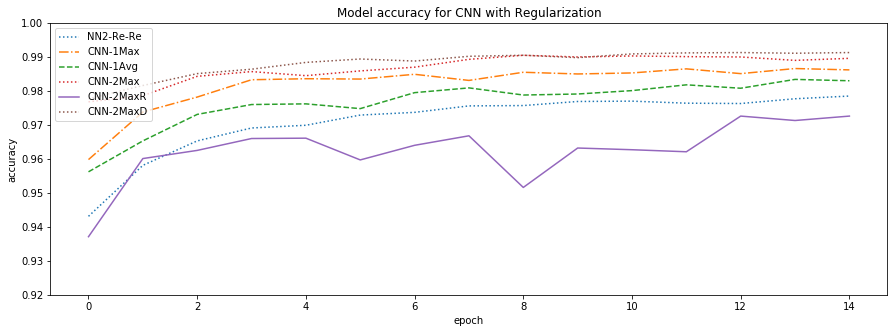

In [289]:
name=['NN2-Re-Re','CNN-1Max','CNN-1Avg','CNN-2Max', 'CNN-2MaxR','CNN-2MaxD']
# PLOT ACCURACIES
plt.figure(figsize=(15,5))
plt.plot(h3.history['val_acc'],linestyle=styles[0])
plt.plot(history.history['val_acc'],linestyle=styles[1])
plt.plot(h1C.history['val_acc'],linestyle=styles[2])
plt.plot(h2C.history['val_acc'],linestyle=styles[3])
plt.plot(h3C.history['val_acc'],linestyle=styles[4])
plt.plot(h4C.history['val_acc'],linestyle=styles[0])
plt.title('Model accuracy for CNN with Regularization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(name, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.92,1])
plt.show()

We see some interesting results above: 
- Conventional Neural Networks with 2 layers of max pooling with 20% Dropout (Model 4C) is the best performing model
- Conventional Neural Networks with 2 layers of max pooling (Model 2C) is second best performing model
- Regularization for these images do not seem to work too well as seen by the model (CNN - 2Max R); it is the same model as the one above, but with l2 norm regularization
- The simple two dense layer model with Relu activation does hold its own


### 3.0 Model Evaluation

In [291]:
#select the image and the label
xtest=[t[0] for t in test]
ytest=[t[1] for t in test]

In [292]:
#convert to numpy format
xtest=np.asarray(xtest)
ytr_cat=to_categorical(ytest,num_classes=10)

In [509]:
#predict from Model 4C
p4C=model4C.predict(xtest)

In [510]:
#predict from Model 3
p3=model3.predict(xtest)

In [524]:
#predict from Model 6
p6=model6.predict(xtest)

In [570]:
def label_eval(pred,tru):
    num=np.arange(0,10)
    ind=[]
    lab=[]
    t=[]
    for i in np.arange(len(pred)):
        lab.append(pred[i].argmax())
        t.append(tru[i])
        ind.append(i)
    res=pd.DataFrame({'index':ind,'pred':lab,'truth':t})
    res['eval']=0
    res.loc[res['pred'] != res['truth'], 'eval'] = 1
    return (res)

In [571]:
#label evaluation for Model 4C
l4C=label_eval(p4C,ytest)

In [572]:
#label evaluation for Model 3
l3=label_eval(p3,ytest)

In [573]:
#label evaluation for Model 6
l6=label_eval(p6,ytest)

In [753]:
l6[0:5]

,index,pred,truth,eval
0,0,7,7,0
1,1,2,2,0
2,2,1,1,0
3,3,0,0,0
4,4,4,4,0


In [581]:
#number of errors on the test set for Model 4C
len(l4C.loc[l4C['eval']==1,])

80

In [582]:
l4C_errors=l4C.loc[l4C['eval']==1,]

In [583]:
#number of errors on the test for Model 3
len(l3.loc[l3['eval']==1,])

212

In [755]:
#filter out all errors for Model 3
l3_errors=l3.loc[l3['eval']==1,]

In [585]:
#number of errors on the test set for Model 6
len(l6.loc[l6['eval']==1,])

576

In [750]:
#filter out all the errors for Model 6
l6_errors=l6.loc[l6['eval']==1,]

In [743]:
def mnist_plot_mult(image, xi,yi,pred,tr):
    fig = plt.figure()
    for i in np.arange(1,xi+1):
        for j in np.arange(1,yi+1):
            b=image[(i-1)*(j-1)].reshape(-1, 28) #reshape to 28 by 28 image
            ax = fig.add_subplot(xi,yi, yi*(i-1)+j)
            ax.matshow(b, cmap = matplotlib.cm.binary)
            ax.set_title('P=%s,A=%s' %(pred[yi*(i-1)+j-1],tr[yi*(i-1)+j-1]))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

In [731]:
list(l4C_errors['index'].head(n=15))

[445,
 582,
 619,
 684,
 720,
 924,
 947,
 1014,
 1039,
 1112,
 1226,
 1247,
 1260,
 1319,
 1393]

#### Model 4C: CNN with Dropout (best performing model)

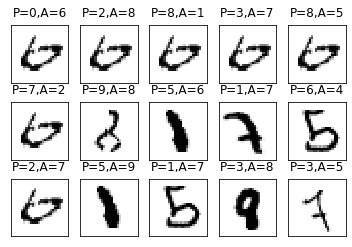

In [747]:
#Model 4C errors 
mnist_plot_mult(xtest[list(l4C_errors['index'].head(n=15))],3,5,list(l4C_errors['pred'].head(n=15)),list(l4C_errors['truth'].head(n=15)))

#### Model 6 Errors: Neural Network with Regularization

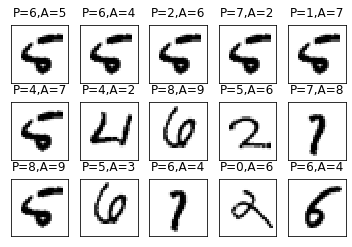

In [752]:
#Model 6 errors 
mnist_plot_mult(xtest[list(l6_errors['index'].head(n=15))],3,5,list(l6_errors['pred'].head(n=15)),list(l6_errors['truth'].head(n=15)))

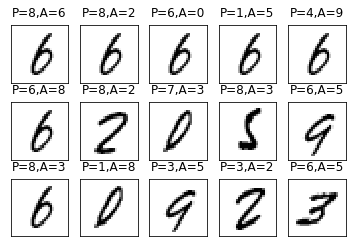

In [754]:
#Model 6 errors 
mnist_plot_mult(xtest[list(l6_errors['index'].tail(n=15))],3,5,list(l6_errors['pred'].tail(n=15)),list(l6_errors['truth'].tail(n=15)))

#### Model 3C: Two Dense layer, Neural Nework with ReLu Activiation functions

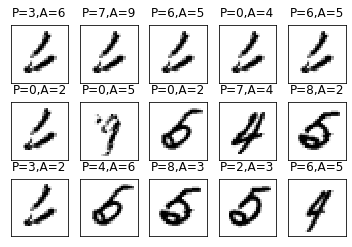

In [756]:
#Model 6 errors 
mnist_plot_mult(xtest[list(l3_errors['index'].tail(n=15))],3,5,list(l3_errors['pred'].tail(n=15)),list(l3_errors['truth'].tail(n=15)))

#### References
https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist

http://neuralnetworksanddeeplearning.com